<a href="https://colab.research.google.com/github/jimuelceleste/system-modeling-notes/blob/main/EnE%20305%20-%20Phase_Portraits_of_ASQ_SEIR_NLIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# ASQ-SEIR-NLIR Model

In [ ]:
# ASQ-SEIR-NLIR Model 

def get_asq_seir_nlir(params):
    beta = params["beta"]
    sigma = params["sigma"]
    gamma = params["gamma"]
    q = params["q"]
    u = params["u"]
    alpha = params["alpha"]
    epsilon = params["epsilon"]
  
    def asq_seir_nlir(t, y):
        s, e, i, r = y
        n = sum(y)
        return np.array([
            (-beta * q * s * i / n) / ((1 + alpha * s / n) * (1 + epsilon * i / n)), 
            ((beta * q * s * i / n) / ((1 + alpha * s / n) * (1 + epsilon * i / n))) - sigma * u * e, 
            sigma * u * e - gamma * i, 
            gamma * i
        ])
    return asq_seir_nlir

def r_naught(params):
    beta = params["beta"]
    gamma = params["gamma"]
    q = params["q"]
    alpha = params["alpha"]
   
    return (beta * q) / (gamma * (1 + alpha))

# Runge-Kutta Method 4th Order (RK4)

In [ ]:
# RK4 

def rk4(f, h, t0, y0):
    k1 = f(t0, y0)
    k2 = f(t0 + h/2, y0 + h * k1/2)
    k3 = f(t0 + h/2, y0 + h * k2/2)
    k4 = f(t0 + h, y0 + h * k3)
    return y0 + 1/6 * h * (k1 + 2*k2 + 2*k3 + k4)

def solve_ode_with_rk4(f, h, t0, y0, tn): 
    y = [y0]
    yi = y0
    t = [t0] 
    ti = t0 

    while ti <= tn:
        yi = rk4(f, h, ti, yi) 
        ti += h 
        y.append(yi)
        t.append(ti)
    
    return y, t 

# Demo: SEIR Graphs + Trajectory in Phase Plane

## $R_0 > 1$ 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


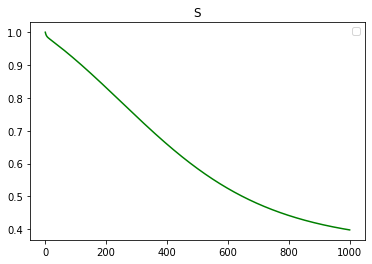

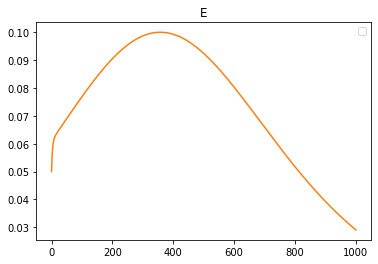

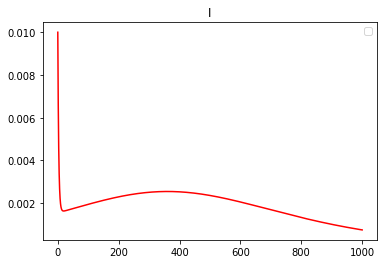

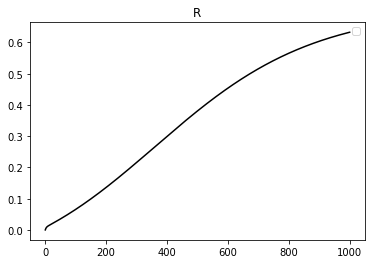

In [ ]:
params = {
    "beta": 3.12,
    "sigma": 0.28,
    "gamma": 0.33, 
    "q": 0.2,
    "u": 0.03,
    "alpha": 0.36,
    "epsilon": 0.7
}

f = get_asq_seir_nlir(params)

seir0 = np.array([1, 0.05, 0.01, 0]) #y0
stepsize = 0.25 # h
tn = 1000 # tn
t0 = 0
seir, time = solve_ode_with_rk4(f, stepsize, t0, seir0, tn)
seir = pd.DataFrame(seir, columns=["S","E","I","R"])

colors={
    "S": "g", 
    "E": "C1", 
    "I": "r", 
    "R": "k"
}

for state in "SEIR":
    plt.figure(state)
    plt.title(state)
    plt.plot(time, seir[state], color=colors[state])
    plt.legend()

In [ ]:
seir[["S", "I"]]

,S,I
0,1.000000,0.010000
1,0.998947,0.009310
2,0.997966,0.008676
3,0.997052,0.008094
4,0.996200,0.007560
...,...,...
3997,0.397780,0.000749
3998,0.397741,0.000749
3999,0.397703,0.000748
4000,0.397664,0.000748


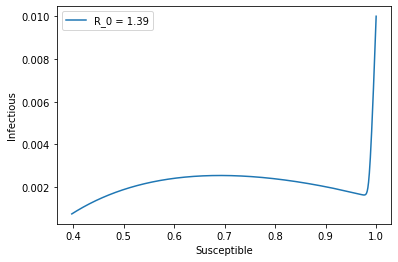

In [ ]:
plt.figure()
plt.xlabel("Susceptible")
plt.ylabel("Infectious")
plt.plot(seir["S"], seir["I"], label="R_0 = %0.02f" % (r_naught(params)))
plt.legend()

## $R_0 = 1$

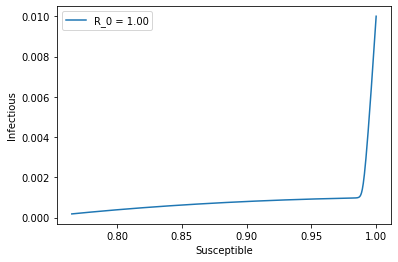

In [ ]:
params = {
    "beta": 1,
    "sigma": 0.28,
    "gamma": 0.5, 
    "q": 0.5,
    "u": 0.03,
    "alpha": 0,
    "epsilon": 0.7
}

f = get_asq_seir_nlir(params)

seir0 = np.array([1, 0.05, 0.01, 0]) #y0
stepsize = 1 # h
tn = 1000 # tn
t0 = 0
seir, time = solve_ode_with_rk4(f, stepsize, t0, seir0, tn)
seir = pd.DataFrame(seir, columns=["S","E","I","R"])

plt.figure()
plt.xlabel("Susceptible")
plt.ylabel("Infectious")
plt.plot(seir["S"], seir["I"], label="R_0 = %0.02f" % (r_naught(params)))
plt.legend()

## $R_0 < 1$

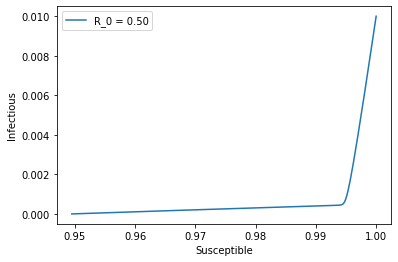

In [ ]:
params = {
    "beta": 0.5,
    "sigma": 0.28,
    "gamma": 1, 
    "q": 1,
    "u": 0.03,
    "alpha": 0,
    "epsilon": 0.7
}

f = get_asq_seir_nlir(params)

seir0 = np.array([1, 0.05, 0.01, 0]) #y0
stepsize = 0.25 # h
tn = 1000 # tn
t0 = 0
seir, time = solve_ode_with_rk4(f, stepsize, t0, seir0, tn)
seir = pd.DataFrame(seir, columns=["S","E","I","R"])

plt.figure()
plt.xlabel("Susceptible")
plt.ylabel("Infectious")
plt.plot(seir["S"], seir["I"], label="R_0 = %0.02f" % (r_naught(params)))
plt.legend()

# $R_0 = \infty$

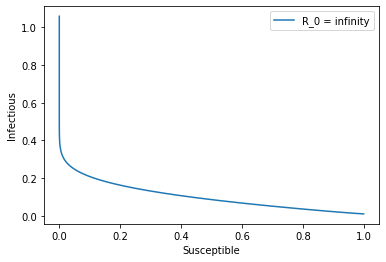

In [ ]:
params = {
    "beta": 3.12,
    "sigma": 0.28,
    "gamma": 0, 
    "q": 0.2,
    "u": 0.03,
    "alpha": 0.36,
    "epsilon": 0.7
}

f = get_asq_seir_nlir(params)

seir0 = np.array([1, 0.05, 0.01, 0]) #y0
stepsize = 0.25 # h
tn = 1000 # tn
t0 = 0
seir, time = solve_ode_with_rk4(f, stepsize, t0, seir0, tn)
seir = pd.DataFrame(seir, columns=["S","E","I","R"])

plt.figure()
plt.xlabel("Susceptible")
plt.ylabel("Infectious")
plt.plot(seir["S"], seir["I"], label="R_0 = infinity")
plt.legend()

## $R_0 > 1$, $R_0 = 1$, and $R_0 < 1$

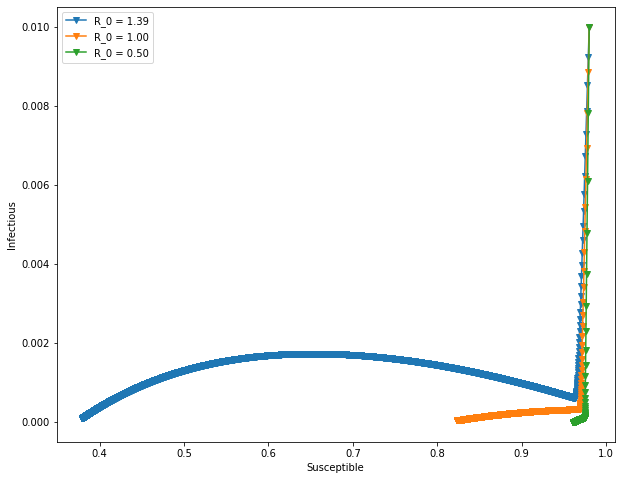

In [ ]:
stepsize = 0.25 # h
tn = 2000 # tn
t0 = 0
seir0 = np.array([0.98, 0.01, 0.01, 0]) #y0

plt.figure(figsize=(10, 8))
plt.xlabel("Susceptible")
plt.ylabel("Infectious")

style = "v-"

# R0 > 1
params = {
    "beta": 3.12,
    "sigma": 0.28,
    "gamma": 0.33, 
    "q": 0.2,
    "u": 0.03,
    "alpha": 0.36,
    "epsilon": 0.7
}
f = get_asq_seir_nlir(params)
seir, time = solve_ode_with_rk4(f, stepsize, t0, seir0, tn)
seir = pd.DataFrame(seir, columns=["S","E","I","R"])
plt.plot(seir["S"], seir["I"], style, label="R_0 = %0.02f" % (r_naught(params)))

# R0 = 1
params = {
    "beta": 1,
    "sigma": 0.28,
    "gamma": 0.5, 
    "q": 0.5,
    "u": 0.03,
    "alpha": 0,
    "epsilon": 0.7
}
f = get_asq_seir_nlir(params)
seir, time = solve_ode_with_rk4(f, stepsize, t0, seir0, tn)
seir = pd.DataFrame(seir, columns=["S","E","I","R"])
plt.plot(seir["S"], seir["I"], style, label="R_0 = %0.02f" % (r_naught(params)))

# R0 < 1
params = {
    "beta": 0.5,
    "sigma": 0.28,
    "gamma": 1, 
    "q": 1,
    "u": 0.03,
    "alpha": 0,
    "epsilon": 0.7
}
f = get_asq_seir_nlir(params)
seir, time = solve_ode_with_rk4(f, stepsize, t0, seir0, tn)
seir = pd.DataFrame(seir, columns=["S","E","I","R"])
plt.plot(seir["S"], seir["I"], style, label="R_0 = %0.02f" % (r_naught(params)))

plt.legend()

# Demo: Gamma (removal rate) is zero.


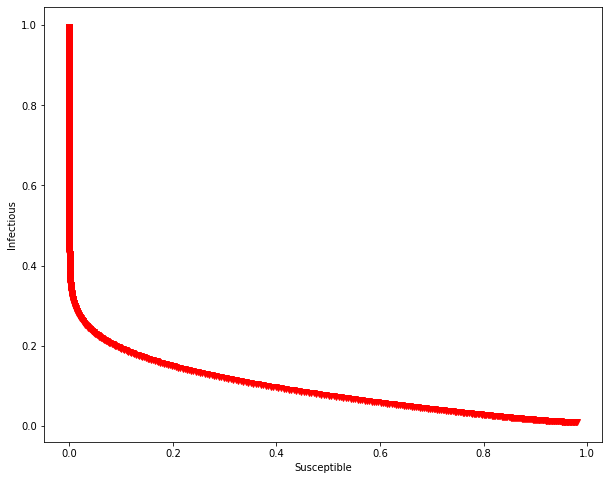

In [ ]:
stepsize = 0.25 # h
tn = 700 # tn
t0 = 0
seir0 = np.array([0.98, 0.01, 0.01, 0]) #y0

plt.figure(figsize=(10, 8))
plt.xlabel("Susceptible")
plt.ylabel("Infectious")

style = "v-r"

params = {
    "beta": 3.12,
    "sigma": 0.28,
    "gamma": 0, 
    "q": 0.2,
    "u": 0.03,
    "alpha": 0.36,
    "epsilon": 0.7
}
f = get_asq_seir_nlir(params)
seir, time = solve_ode_with_rk4(f, stepsize, t0, seir0, tn)
seir = pd.DataFrame(seir, columns=["S","E","I","R"])
plt.plot(seir["S"], seir["I"], style, label="R_0 = infty")